In [1]:
import numpy as np
import pandas as pd
import itertools as it

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ks_2samp
import GRIN_analysis_tools as ga

from path import Path
import warnings
from warnings import warn
from collections import OrderedDict
import itertools
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import minmax_scale, scale
from sklearn import preprocessing
from scipy.integrate import simps
from numpy import trapz
from sklearn.metrics import auc
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

path = 'dataset/'
# export_path = '/Volumes/lab-kohlj/home/shared/projects/pregnancy_2021/Figure_4/linked_figure_4/' 
export_path = 'output_figures/'

In [2]:
# Path to calcium and behaviour recordings
path = 'dataset/'

# Experimental conditions
states = ['virgin','PD18', 'PD50']

# Analysis parameters

IDs = ['JKAA40.3e','JKAA40.4i','JKAA40.4h', 'JKAA40.5d', 'JKAA44.2i']

convolve = 'non_convolved' #non_convolved

fr = 20
window = 2

## visualizing cell traces

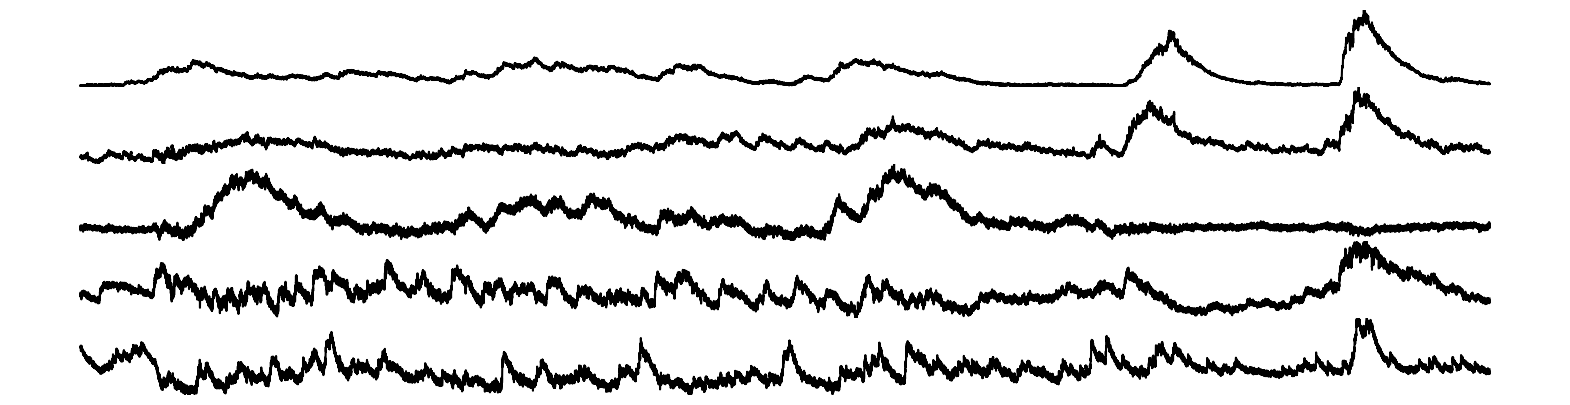

In [4]:
state = 'virgin'
ID = 'JKAA40.4i'

df = ga.load_inscopix(path + f'{ID}/{convolve}/{ID}_registered_{state}'+'.csv', normalisation= 'fixed interval')
episode = pd.DataFrame(df).reset_index(drop = True)
_, bdf, original = ga.preprocess_behaviour(path + f'{ID}/{ID}_behav_{state}_post.csv', df.shape[1])



fig = plt.figure(figsize = (20,5))
gs = fig.add_gridspec(5, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i in range(5):
    axs[i].plot(episode.T[i], color = 'black')

   
    axs[i].set_ylim([0,1]) 
    axs[i].axis('off')
    
plt.ylim([0,1])   
# plt.savefig(export_path +'example_traces.pdf', dpi = 300, bbox_inches='tight')
plt.show()

# visualizing that the sniff response decays in time

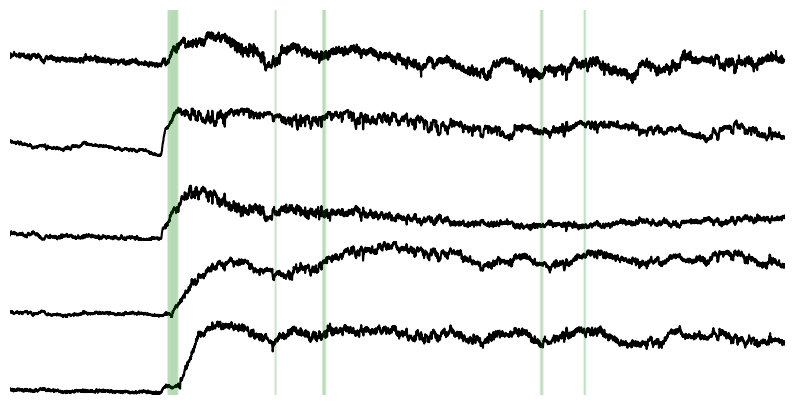

In [6]:
state = 'virgin'
ID = 'JKAA40.4i'

df = ga.load_inscopix(path + f'{ID}/{convolve}/{ID}_registered_{state}'+'.csv', normalisation= 'fixed interval')
# Plotting the behaviour raster plot
_, bdf, original = ga.preprocess_behaviour(path + f'{ID}/{ID}_behav_{state}_post.csv', df.shape[1])

end_inx = start = np.where((bdf['end trial'].diff() > 0))[0][0]

end_inx = 5000
start_inx =0
event = bdf.loc[start_inx:end_inx]
behavs = event.columns
events = []
sniff_inx = [i for i, j in enumerate(event.columns) if j == 'pup sniff']

for i in range(event.shape[1]):
    events.append(event.iloc[:,i].to_numpy().nonzero()[0])
    
colors = ['Tab:blue', 'orange', 'red', 'purple']

episode = pd.DataFrame(df).reset_index(drop = True).iloc[:,start_inx:end_inx]

#select example neurons
episode = episode.iloc[[3,6,16,9,14]].reset_index(drop = True)


#plot example traces
fig = plt.figure(figsize = (10,5))
gs = fig.add_gridspec(5, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i in range(5):
    axs[i].plot(episode.T[i],color = 'black')
    axs[i].eventplot(events[sniff_inx[0]], linelengths=1,color = 'green', lineoffsets = 0.5,alpha = 0.03)
    
        
    axs[i].set_ylim([0,1]) 
    axs[i].axis('off')
 
plt.xlim([1200,5000])
plt.ylim([0,1])   
# plt.savefig(export_path +'demo_sniff.pdf', dpi = 300, bbox_inches='tight')
plt.show()